# Used Car Price Prediction using Linear Regression

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [2]:
#Reading the dataset
Cars=pd.read_csv("D:\\car_data.csv")
Cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
#Displaying the features
Cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

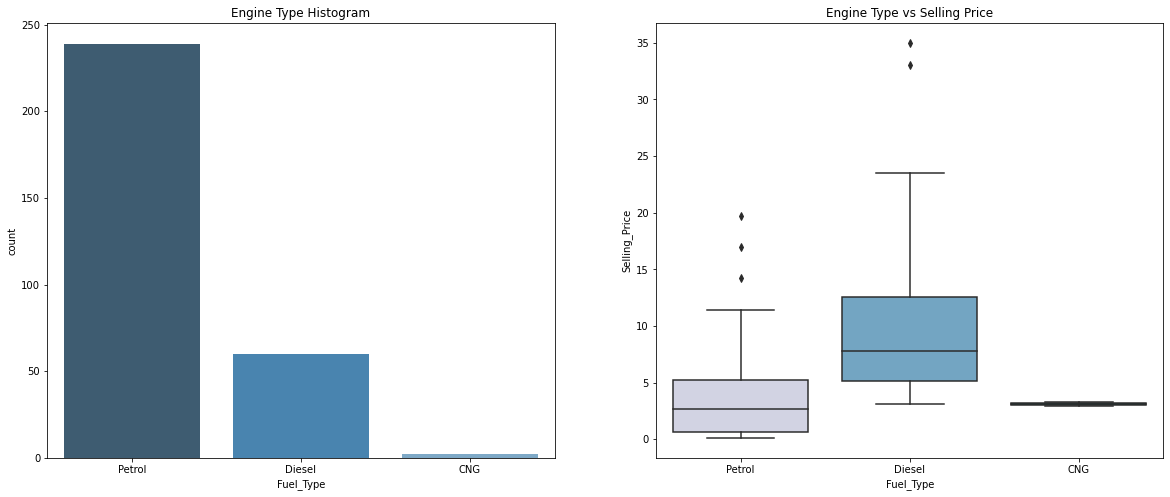

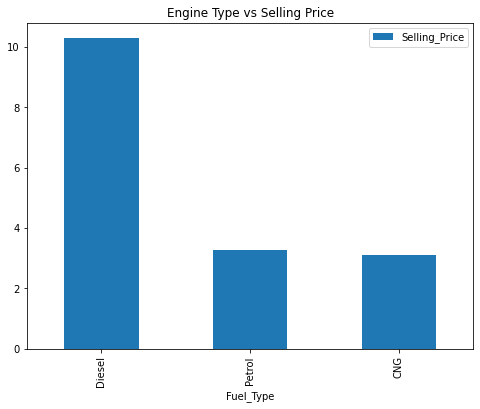

In [33]:

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(Cars.Fuel_Type, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Selling Price')
sns.boxplot(x=Cars.Fuel_Type, y=Cars.Selling_Price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(Cars.groupby(['Fuel_Type'])['Selling_Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Selling Price')
plt.show()

In [5]:

#Dropping the Car Name Column
final_df=Cars.drop('Car_Name',axis=1)

In [6]:
final_df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [7]:
#Converting string to numeric
df=pd.get_dummies(final_df,drop_first=True)

In [8]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,1,0,1
298,2009,3.35,11.00,87934,0,0,1,0,1
299,2017,11.50,12.50,9000,0,1,0,0,1


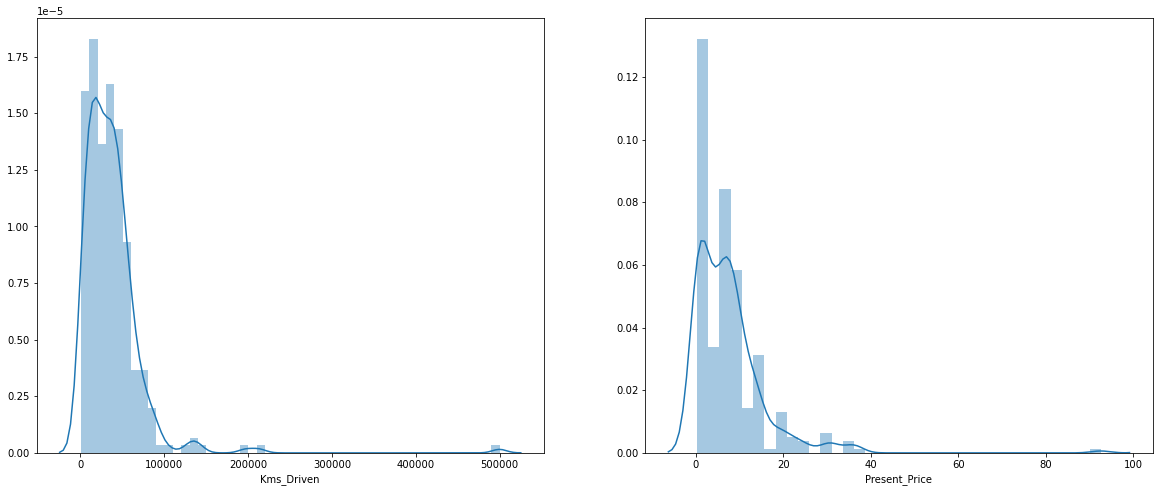

In [9]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df.Kms_Driven)
plt.subplot(1,2,2)
sns.distplot(df.Present_Price)

In [11]:
#Dropping the selling price column from the dataset and saving it into X
X=df.drop('Selling_Price',axis=1)
X


,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,0,1,0,1
1,2013,9.54,43000,0,1,0,0,1
2,2017,9.85,6900,0,0,1,0,1
3,2011,4.15,5200,0,0,1,0,1
4,2014,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,1,0,0,1
297,2015,5.90,60000,0,0,1,0,1
298,2009,11.00,87934,0,0,1,0,1
299,2017,12.50,9000,0,1,0,0,1


In [12]:
#The selling price column into Y
Y=final_df['Selling_Price']
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

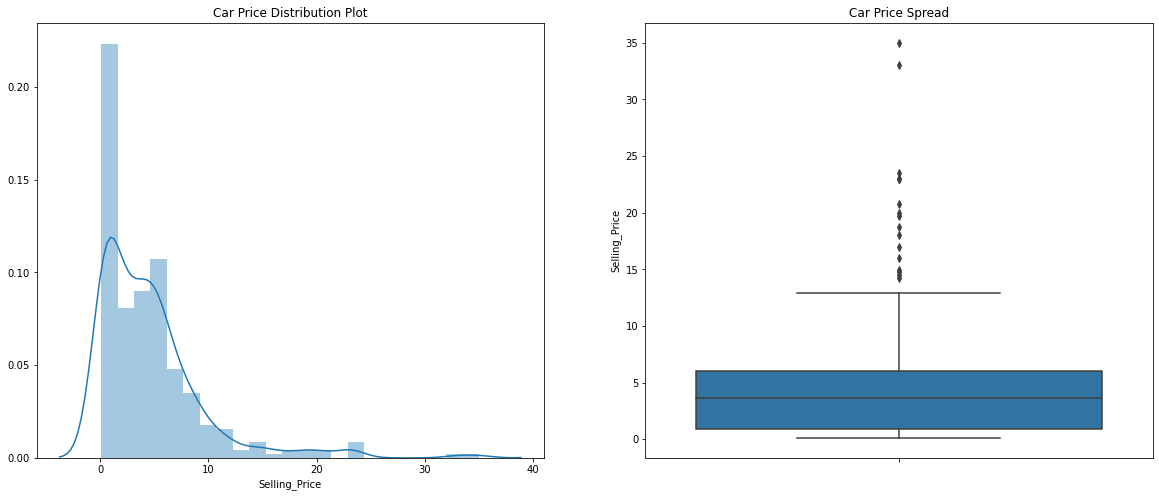

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.Selling_Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.Selling_Price)

plt.show()

In [14]:
print(Cars.Selling_Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
85%        8.250000
90%        9.500000
100%      35.000000
max       35.000000
Name: Selling_Price, dtype: float64


In [34]:
#Splitting the dataset into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)


In [16]:
#Dimension of X
X.shape

(301, 8)

In [17]:
#Dimension of Y
Y.shape

(301,)

In [18]:
#Dimension of X_train
X_train.shape

(225, 8)

In [19]:
#Dimension of X_test
X_test.shape

(76, 8)

In [20]:
#Dimension of y_train
y_train.shape

(225,)

In [21]:
#Dimension of y_test
y_test.shape

(76,)

In [22]:
#Displaying X_train 
X_train

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
146,2014,0.787,15000,0,0,1,1,1
260,2016,13.600,29223,0,0,1,0,1
37,2003,2.280,127000,0,0,1,1,1
273,2010,7.500,61203,0,0,1,0,1
164,2016,0.540,14000,0,0,1,1,1
...,...,...,...,...,...,...,...,...
251,2013,9.900,56701,0,0,1,0,1
192,2007,0.750,49000,1,0,1,1,1
117,2015,1.900,14000,0,0,1,1,1
47,2006,4.150,65000,0,0,1,0,1


In [23]:
#Displaying X_test
X_test

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
223,2015,9.400,61381,0,1,0,0,1
150,2011,0.826,6000,0,0,1,1,1
226,2015,5.700,24678,0,0,1,0,1
296,2016,11.600,33988,0,1,0,0,1
52,2017,19.770,15000,0,1,0,0,0
...,...,...,...,...,...,...,...,...
46,2013,4.890,64532,0,0,1,0,1
158,2017,0.540,8600,0,0,1,1,1
230,2013,9.400,45000,0,1,0,0,1
179,2010,1.050,213000,0,0,1,1,1


In [24]:
#Displaying y_train
y_train

146    0.55
260    9.15
37     0.35
273    2.25
164    0.45
       ... 
251    5.00
192    0.20
117    1.10
47     1.05
172    0.40
Name: Selling_Price, Length: 225, dtype: float64

In [25]:
#Displaying y_test
y_test

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
46      2.65
158     0.48
230     6.15
179     0.31
27      6.00
Name: Selling_Price, Length: 76, dtype: float64

In [26]:
#Modelling using Linear Regression
linreg=LinearRegression()
linreg.fit(X_train,y_train)
print("Training Complete")

Training Complete


In [27]:
#Displaying the coeff
linreg.coef_

array([ 3.63463323e-01,  4.07811942e-01, -5.47143331e-06, -8.95729072e-01,
        2.52576656e+00,  7.21464672e-01, -1.32640499e+00, -1.21165282e+00])

In [28]:
#Displaying the intercept
linreg.intercept_

-729.7222308416973

In [29]:
#Mean Square Error
np.mean((linreg.predict(X_test)-y_test)**2)

4.349378132257823

In [30]:
#Evaluation
linreg.score(X_test,y_test)

0.8639362504420849

In [31]:
#Mean Squared error
kfold=model_selection.KFold(n_splits=10,random_state=7,shuffle=True)
scoring='neg_mean_squared_error'
results=model_selection.cross_val_score(linreg,X,Y,cv=kfold,scoring=scoring)
print("MSE:%.3f(%.3f)"%(results.mean(),results.std()))

MSE:-4.615(3.837)
